In [1]:
import pandas as pd
import glob

incoming_files = glob.glob('./train/incoming_run_data_*.parquet')
print(incoming_files)
incoming_run_df = pd.concat([pd.read_parquet(f) for f in incoming_files], ignore_index=True)

print(incoming_run_df.info())
print(incoming_run_df.describe())
print(incoming_run_df.head())


['./train/incoming_run_data_54.parquet', './train/incoming_run_data_10.parquet', './train/incoming_run_data_2.parquet', './train/incoming_run_data_3.parquet', './train/incoming_run_data_55.parquet', './train/incoming_run_data_1.parquet', './train/incoming_run_data_57.parquet', './train/incoming_run_data_8.parquet', './train/incoming_run_data_56.parquet', './train/incoming_run_data_9.parquet', './train/incoming_run_data_60.parquet', './train/incoming_run_data_53.parquet', './train/incoming_run_data_52.parquet', './train/incoming_run_data_4.parquet', './train/incoming_run_data_59.parquet', './train/incoming_run_data_6.parquet', './train/incoming_run_data_58.parquet', './train/incoming_run_data_7.parquet', './train/incoming_run_data_51.parquet']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82896506 entries, 0 to 82896505
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Tool ID         object        
 1   Run Start Time  date

In [2]:
agg_sensor = incoming_run_df.groupby("Run ID").agg({
    "Sensor Value": ["mean", "std", "min", "max", "median"],
    "Time Stamp": ["min", "max"]
}).reset_index()

# Optionally flatten column names
agg_sensor.columns = ["_".join(col).strip("_") for col in agg_sensor.columns.values]

print(agg_sensor.head())
print(agg_sensor.shape)


                                 Run ID  Sensor Value_mean  Sensor Value_std  \
0  000f424f-667d-54a2-bbbd-9624c4071465         254.504913        493.632812   
1  001466b9-ee4c-5642-8e93-0a501ce4e9d9         410.402985        950.537781   
2  002d6c65-b86f-5153-a2d8-206e59da6307         251.209854        451.429260   
3  002fdc18-a36b-5188-a5e3-9e1d59697a6b         319.074219        750.262207   
4  004379ac-3743-5811-bb3b-d1821813b2d2         286.703552        594.347534   

   Sensor Value_min  Sensor Value_max  Sensor Value_median  \
0         -8.210770       5391.519531            53.776615   
1        -13.324909      11006.703125            54.651024   
2        -10.215524       2921.593750            44.883816   
3        -15.324958       6997.719238            40.512604   
4        -13.461661       4208.125000            38.580402   

       Time Stamp_min                Time Stamp_max  
0 2023-12-31 22:56:04 2023-12-31 23:03:52.000000000  
1 2024-01-01 00:07:30 2024-01-01 00:16

In [3]:
import pandas as pd
import glob

metrology_files = glob.glob('./train/metrology_data*.parquet')
print(metrology_files)
metrology_df = pd.concat([pd.read_parquet(f) for f in metrology_files], ignore_index=True)

print(metrology_df.info())
print(metrology_df.describe())
print(metrology_df.head())

['./train/metrology_data58.parquet', './train/metrology_data7.parquet', './train/metrology_data51.parquet', './train/metrology_data6.parquet', './train/metrology_data59.parquet', './train/metrology_data4.parquet', './train/metrology_data52.parquet', './train/metrology_data53.parquet', './train/metrology_data56.parquet', './train/metrology_data9.parquet', './train/metrology_data60.parquet', './train/metrology_data8.parquet', './train/metrology_data57.parquet', './train/metrology_data1.parquet', './train/metrology_data55.parquet', './train/metrology_data3.parquet', './train/metrology_data54.parquet', './train/metrology_data2.parquet', './train/metrology_data10.parquet']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202860 entries, 0 to 202859
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Run ID          202860 non-null  object        
 1   Run Start Time  202860 non-null  datetime64[ns]
 

In [4]:
import pandas as pd
import glob

run_data_files = glob.glob('./train/run_data_*.parquet')
print(run_data_files)
run_data_df = pd.concat([pd.read_parquet(f) for f in run_data_files], ignore_index=True)

print(run_data_df.info())
print(run_data_df.describe())
print(run_data_df.head())

['./train/run_data_56.parquet', './train/run_data_7.parquet', './train/run_data_60.parquet', './train/run_data_6.parquet', './train/run_data_57.parquet', './train/run_data_4.parquet', './train/run_data_55.parquet', './train/run_data_54.parquet', './train/run_data_10.parquet', './train/run_data_58.parquet', './train/run_data_9.parquet', './train/run_data_51.parquet', './train/run_data_1.parquet', './train/run_data_8.parquet', './train/run_data_59.parquet', './train/run_data_3.parquet', './train/run_data_52.parquet', './train/run_data_53.parquet', './train/run_data_2.parquet']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41220750 entries, 0 to 41220749
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Tool ID          object        
 1   Run Start Time   datetime64[ns]
 2   Run End Time     datetime64[ns]
 3   Run ID           object        
 4   Process Step     object        
 5   Consumable Life  float32       
 6   St

In [5]:
#filter and run relevant RUN IDs
relevant_run_ids = metrology_df["Run ID"].unique()
run_data_df = run_data_df[run_data_df["Run ID"].isin(relevant_run_ids)]

In [6]:
print(metrology_df.columns)
print(agg_sensor.columns)
print(run_data_df.columns)

# All three DataFrames must have "Run ID" spelled exactly the same.

Index(['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X',
       'Y', 'Point Index', 'Measurement'],
      dtype='object')
Index(['Run ID', 'Sensor Value_mean', 'Sensor Value_std', 'Sensor Value_min',
       'Sensor Value_max', 'Sensor Value_median', 'Time Stamp_min',
       'Time Stamp_max'],
      dtype='object')
Index(['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step',
       'Consumable Life', 'Step ID', 'Time Stamp', 'Sensor Name',
       'Sensor Value'],
      dtype='object')


In [7]:
print("Duplicates in agg_sensor:", agg_sensor["Run ID"].duplicated().sum())
print("Duplicates in run_data_df:", run_data_df["Run ID"].duplicated().sum())

# If agg_sensor or run_data_df has duplicate Run ID values, the merge may result in explosion of rows.

Duplicates in agg_sensor: 0
Duplicates in run_data_df: 41216610


In [8]:
agg_run_data = run_data_df.groupby("Run ID").agg({
    "Consumable Life": ["mean", "max", "min"],
    "Tool ID": "first",
    "Process Step": "first",
}).reset_index()

# Flatten column names
agg_run_data.columns = ["_".join(col).strip("_") for col in agg_run_data.columns.values]

# Aggregate run_data_df to one row per Run ID

In [9]:
# print(set(metrology_df['Run ID']).intersection(set(agg_sensor['Run ID'])))

In [10]:
merged_df = metrology_df.merge(agg_sensor, on="Run ID", how="inner")
merged_df = merged_df.merge(agg_run_data, on="Run ID", how="left")

merged_df

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement,Sensor Value_mean,...,Sensor Value_min,Sensor Value_max,Sensor Value_median,Time Stamp_min,Time Stamp_max,Consumable Life_mean,Consumable Life_max,Consumable Life_min,Tool ID_first,Process Step_first
0,00970470-f2f4-5759-86c4-f31fe6abdc5a,2024-01-01 04:41:20,2024-01-01 04:53:55,1,23,-143.877551,-9.183673,3,10.104178,351.992432,...,-3.053978,5041.336914,50.410980,2023-12-31 05:59:28,2023-12-31 06:07:38.999999998,88.643364,88.643364,88.643364,4738fd3d-8fc7-59fd-85a7-eec6efb4bfae,22c8716b-1c14-525a-8c0a-0473ec7aa99e
1,00970470-f2f4-5759-86c4-f31fe6abdc5a,2024-01-01 04:41:20,2024-01-01 04:53:55,1,29,-143.877551,27.551020,48,10.064924,351.992432,...,-3.053978,5041.336914,50.410980,2023-12-31 05:59:28,2023-12-31 06:07:38.999999998,88.643364,88.643364,88.643364,4738fd3d-8fc7-59fd-85a7-eec6efb4bfae,22c8716b-1c14-525a-8c0a-0473ec7aa99e
2,00970470-f2f4-5759-86c4-f31fe6abdc5a,2024-01-01 04:41:20,2024-01-01 04:53:55,2,34,-137.755102,58.163265,43,10.039947,351.992432,...,-3.053978,5041.336914,50.410980,2023-12-31 05:59:28,2023-12-31 06:07:38.999999998,88.643364,88.643364,88.643364,4738fd3d-8fc7-59fd-85a7-eec6efb4bfae,22c8716b-1c14-525a-8c0a-0473ec7aa99e
3,00970470-f2f4-5759-86c4-f31fe6abdc5a,2024-01-01 04:41:20,2024-01-01 04:53:55,3,14,-131.632653,-64.285714,20,10.139306,351.992432,...,-3.053978,5041.336914,50.410980,2023-12-31 05:59:28,2023-12-31 06:07:38.999999998,88.643364,88.643364,88.643364,4738fd3d-8fc7-59fd-85a7-eec6efb4bfae,22c8716b-1c14-525a-8c0a-0473ec7aa99e
4,00970470-f2f4-5759-86c4-f31fe6abdc5a,2024-01-01 04:41:20,2024-01-01 04:53:55,5,39,-119.387755,88.775510,8,10.037289,351.992432,...,-3.053978,5041.336914,50.410980,2023-12-31 05:59:28,2023-12-31 06:07:38.999999998,88.643364,88.643364,88.643364,4738fd3d-8fc7-59fd-85a7-eec6efb4bfae,22c8716b-1c14-525a-8c0a-0473ec7aa99e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202855,ff189126-dd33-50b0-8eea-5bab9318b543,2024-01-01 11:43:20,2024-01-01 11:55:55,44,11,119.387755,-82.653061,5,10.141212,388.315979,...,-14.843861,7364.522949,44.715263,2023-12-31 15:00:40,2023-12-31 15:08:58.000000000,106.209297,106.209305,106.209305,c7f536aa-a2fc-54b4-9b98-9f01793c9b5d,22c8716b-1c14-525a-8c0a-0473ec7aa99e
202856,ff189126-dd33-50b0-8eea-5bab9318b543,2024-01-01 11:43:20,2024-01-01 11:55:55,44,39,119.387755,88.775510,22,10.285743,388.315979,...,-14.843861,7364.522949,44.715263,2023-12-31 15:00:40,2023-12-31 15:08:58.000000000,106.209297,106.209305,106.209305,c7f536aa-a2fc-54b4-9b98-9f01793c9b5d,22c8716b-1c14-525a-8c0a-0473ec7aa99e
202857,ff189126-dd33-50b0-8eea-5bab9318b543,2024-01-01 11:43:20,2024-01-01 11:55:55,46,26,131.632653,9.183673,46,10.305865,388.315979,...,-14.843861,7364.522949,44.715263,2023-12-31 15:00:40,2023-12-31 15:08:58.000000000,106.209297,106.209305,106.209305,c7f536aa-a2fc-54b4-9b98-9f01793c9b5d,22c8716b-1c14-525a-8c0a-0473ec7aa99e
202858,ff189126-dd33-50b0-8eea-5bab9318b543,2024-01-01 11:43:20,2024-01-01 11:55:55,48,21,143.877551,-21.428571,16,10.325929,388.315979,...,-14.843861,7364.522949,44.715263,2023-12-31 15:00:40,2023-12-31 15:08:58.000000000,106.209297,106.209305,106.209305,c7f536aa-a2fc-54b4-9b98-9f01793c9b5d,22c8716b-1c14-525a-8c0a-0473ec7aa99e


In [11]:
print("Merged shape:", merged_df.shape)
print(merged_df.head())

Merged shape: (202860, 21)
                                 Run ID      Run Start Time  \
0  00970470-f2f4-5759-86c4-f31fe6abdc5a 2024-01-01 04:41:20   
1  00970470-f2f4-5759-86c4-f31fe6abdc5a 2024-01-01 04:41:20   
2  00970470-f2f4-5759-86c4-f31fe6abdc5a 2024-01-01 04:41:20   
3  00970470-f2f4-5759-86c4-f31fe6abdc5a 2024-01-01 04:41:20   
4  00970470-f2f4-5759-86c4-f31fe6abdc5a 2024-01-01 04:41:20   

         Run End Time  X_index  Y_index           X          Y  Point Index  \
0 2024-01-01 04:53:55        1       23 -143.877551  -9.183673            3   
1 2024-01-01 04:53:55        1       29 -143.877551  27.551020           48   
2 2024-01-01 04:53:55        2       34 -137.755102  58.163265           43   
3 2024-01-01 04:53:55        3       14 -131.632653 -64.285714           20   
4 2024-01-01 04:53:55        5       39 -119.387755  88.775510            8   

   Measurement  Sensor Value_mean  ...  Sensor Value_min  Sensor Value_max  \
0    10.104178         351.992432  ...   

In [12]:
# import plotly.express as px

# for measurement in merged_df["Measurement"].unique():
#     fig = px.histogram(
#         merged_df[merged_df["Measurement"] == measurement],
#         x="Measurement",
#         title=measurement,
#     )
#     fig.show()

In [13]:
# print(merged_df.columns)
# print(merged_df.head())
# print(merged_df.shape)

In [14]:
# y = merged_df["Measurement"]

# y = merged_df['Sensor Value_mean']

# y = merged_df['Sensor Value_std']

# y = merged_df['Sensor Value_mean']

# y = merged_df['Sensor Value_min']

# y = merged_df['Sensor Value_max']

# y = merged_df['Sensor Value_median']

# y = merged_df['Time Stamp_min']

# y = merged_df['Time Stamp_max']

# y = merged_df['Consumable Life_mean']

# y = merged_df['Consumable Life_max']

# y = merged_df['Consumable Life_min']

In [15]:
#feature enginerring : turn timestamp into duration
merged_df["run_signal_duration"] = (
    merged_df["Time Stamp_max"] - merged_df["Time Stamp_min"]
).dt.total_seconds()


merged_df["Tool ID_encoded"] = merged_df["Tool ID_first"].astype("category").cat.codes
merged_df["run_duration"] = (
    merged_df["Run End Time"] - merged_df["Run Start Time"]
).dt.total_seconds()
merged_df["run_hour"] = merged_df["Run Start Time"].dt.hour

In [16]:
#filter extreme sensor values using 1st and 99th percentile filtering on sensor features

sensor_cols = [
    "Sensor Value_mean", "Sensor Value_std", 
    "Sensor Value_min", "Sensor Value_max"
]

for col in sensor_cols:
    q_low = merged_df[col].quantile(0.01)
    q_high = merged_df[col].quantile(0.99)
    merged_df = merged_df[(merged_df[col] >= q_low) & (merged_df[col] <= q_high)]

In [17]:
agg_run_data = run_data_df.groupby("Run ID").agg({
    "Consumable Life": ["mean", "max"],
    "Tool ID": "first"
}).reset_index()

agg_run_data.columns = ["_".join(col).strip("_") for col in agg_run_data.columns.values]

agg_run_data.columns

merged_df["Tool ID_encoded"] = merged_df["Tool ID_first"].astype("category").cat.codes

merged_df["Tool ID_encoded"]

0          5
1          5
2          5
3          5
4          5
          ..
202855    15
202856    15
202857    15
202858    15
202859    15
Name: Tool ID_encoded, Length: 187278, dtype: int8

In [18]:
merged_df["run_duration"] = (
    merged_df["Run End Time"] - merged_df["Run Start Time"]
).dt.total_seconds()

merged_df["run_hour"] = merged_df["Run Start Time"].dt.hour

merged_df["run_hour"]

0          4
1          4
2          4
3          4
4          4
          ..
202855    11
202856    11
202857    11
202858    11
202859    11
Name: run_hour, Length: 187278, dtype: int32

In [19]:
y = merged_df['Measurement']

drop_cols = [
    "Run ID", "Tool ID_first", "Run Start Time", "Run End Time",
    "Time Stamp_min", "Time Stamp_max"
]
X = merged_df.drop(columns=drop_cols + ["Measurement"])  # exclude label too

X = X = X.select_dtypes(include=["number"])

print(X.dtypes)  # keep float, int, or encoded categorical columns
print("Features used:", X.columns)

X_index                   int32
Y_index                   int32
X                       float64
Y                       float64
Point Index               int64
Sensor Value_mean       float32
Sensor Value_std        float32
Sensor Value_min        float32
Sensor Value_max        float32
Sensor Value_median     float32
Consumable Life_mean    float32
Consumable Life_max     float32
Consumable Life_min     float32
run_signal_duration     float64
Tool ID_encoded            int8
run_duration            float64
run_hour                  int32
dtype: object
Features used: Index(['X_index', 'Y_index', 'X', 'Y', 'Point Index', 'Sensor Value_mean',
       'Sensor Value_std', 'Sensor Value_min', 'Sensor Value_max',
       'Sensor Value_median', 'Consumable Life_mean', 'Consumable Life_max',
       'Consumable Life_min', 'run_signal_duration', 'Tool ID_encoded',
       'run_duration', 'run_hour'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)  

# Evaluate
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.08222339333184689


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # #numeric features
# numeric_df = merged_df.select_dtypes(include=["number"])

# # #correlation with measurement
# corr = numeric_df.corr()

# # #Sort most correlated features
# corr_target = corr["Measurement"].drop("Measurement").sort_values(ascending=False)
# print(corr_target)

# plt.figure(figsize=(10, 6))
# sns.barplot(x=corr_target.values, y=corr_target.index)
# plt.title("Correlation of Features with Measurement")
# plt.xlabel("Correlation Coefficient")
# plt.ylabel("Feature")
# plt.tight_layout()
# plt.show()

#commented out because the RMSE is reduced?? I think features that are removed were weakly correlated individually but valuble when merged???

In [ ]:
# low_signal_features = corr_target[abs(corr_target) < 0.05].index.tolist()
# X_filtered = X.drop(columns=low_signal_features)

# print("Dropped low-signal features:", low_signal_features)

#commented out for the same reason as above

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X_filtered, y, test_size=0.2, random_state=42
# )

# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# rmse = root_mean_squared_error(y_test, y_pred)
# print("Filtered RMSE:", rmse)

#Filtered RMSE: 0.12350616306149931 (higher than initial RMSE)

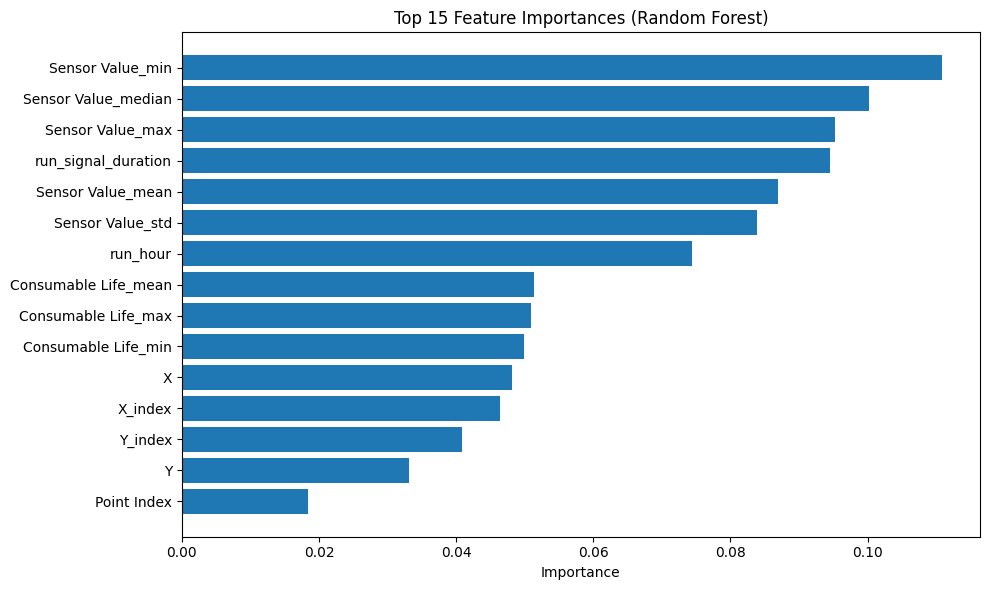

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from model
importances = model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:15], feat_imp_df["Importance"][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [25]:
top_features = feat_imp_df["Feature"][:15].tolist()
X_top = X[top_features]

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)
model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)
rmse_top = root_mean_squared_error(y_test_top, y_pred_top)
print("RMSE after selecting top 15 features:", rmse_top)

RMSE after selecting top 15 features: 0.0811351586721046
